In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload your archive (3).zip

import zipfile
import os

with zipfile.ZipFile("archive (3).zip", 'r') as zip_ref:
    zip_ref.extractall("credit_data")

os.listdir("credit_data")  # Show extracted files (train.csv, test.csv etc.)


Saving archive (3).zip to archive (3).zip


['test.csv', 'train.csv']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load dataset

train_df = pd.read_csv("credit_data/train.csv")   # or adjust path based on extracted content
test_df = pd.read_csv("credit_data/test.csv")     # if available

print(train_df.describe())


<ipython-input-3-34f294a6f29a>:17: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("credit_data/train.csv")   # or adjust path based on extracted content


       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           84998.000000      100000.000000     100000.00000   
mean             4194.170850          17.091280         22.47443   
std              3183.686167         117.404834        129.05741   
min               303.645417          -1.000000          0.00000   
25%              1625.568229           3.000000          4.00000   
50%              3093.745000           6.000000          5.00000   
75%              5957.448333           7.000000          7.00000   
max             15204.633333        1798.000000       1499.00000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000          98035.000000   
mean       72.466040            21.068780             27.754251   
std       466.422621            14.860104            193.177339   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000           

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load CSVs
train_df = pd.read_csv("credit_data/train.csv")
test_df = pd.read_csv("credit_data/test.csv")

# Optional: Check for nulls
print("Train nulls:\n", train_df.isnull().sum())
print("Test nulls:\n", test_df.isnull().sum())

# Fill or drop nulls (simple fill strategy shown here)
train_df.fillna(method='ffill', inplace=True)
test_df.fillna(method='ffill', inplace=True)

# Separate target from features
y = train_df['Credit_Score']
X = train_df.drop('Credit_Score', axis=1)

# Combine train and test for consistent encoding
combined = pd.concat([X, test_df], axis=0)

# Encode categorical columns
# Encode categorical columns safely
label_encoders = {}

for col in combined.select_dtypes(include=['object', 'float64', 'int64']).columns:
    if combined[col].dtype == 'object' or combined[col].nunique() < 20:  # heuristic for categorical
        combined[col] = combined[col].astype(str)  # convert everything to string
        le = LabelEncoder()
        combined[col] = le.fit_transform(combined[col])
        label_encoders[col] = le


# Split back
X_encoded = combined[:len(X)]
test_encoded = combined[len(X):]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
test_scaled = scaler.transform(test_encoded)

# Now use `X_scaled` and `y` for training
# Use `test_scaled` for inference/prediction later


<ipython-input-7-6d3f482b8cba>:5: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("credit_data/train.csv")


Train nulls:
 ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64
Test nulls:
 ID      

<ipython-input-7-6d3f482b8cba>:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_df.fillna(method='ffill', inplace=True)
<ipython-input-7-6d3f482b8cba>:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_df.fillna(method='ffill', inplace=True)


In [ ]:
target_le = LabelEncoder()
y_encoded = target_le.fit_transform(y)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_val)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

# Train the model
rf.fit(X_train, y_train)

# Predict on validation set
y_pred_rf = rf.predict(X_val)

# (You can evaluate or use y_pred_rf later as needed)


In [ ]:
kmeans = KMeans(n_clusters=len(np.unique(y_encoded)), random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X_scaled, cluster_labels)
print(f"K-Means Silhouette Score: {sil_score:.4f}")


K-Means Silhouette Score: 0.0538


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt


In [ ]:
knn_accuracy = accuracy_score(y_val, y_pred_knn)
knn_f1 = f1_score(y_val, y_pred_knn, average='weighted')
knn_recall = recall_score(y_val, y_pred_knn, average='weighted')

# Calculate metrics for Random Forest
rf_accuracy = accuracy_score(y_val, y_pred_rf)
rf_f1 = f1_score(y_val, y_pred_rf, average='weighted')
rf_recall = recall_score(y_val, y_pred_rf, average='weighted')

print("KNN Metrics:")
print(f"Accuracy: {knn_accuracy:.4f}")
print(f"F1 Score: {knn_f1:.4f}")
print(f"Recall: {knn_recall:.4f}\n")

print("Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"F1 Score: {rf_f1:.4f}")
print(f"Recall: {rf_recall:.4f}\n")

KNN Metrics:
Accuracy: 0.6305
F1 Score: 0.6295
Recall: 0.6305

Random Forest Metrics:
Accuracy: 0.7107
F1 Score: 0.7116
Recall: 0.7107



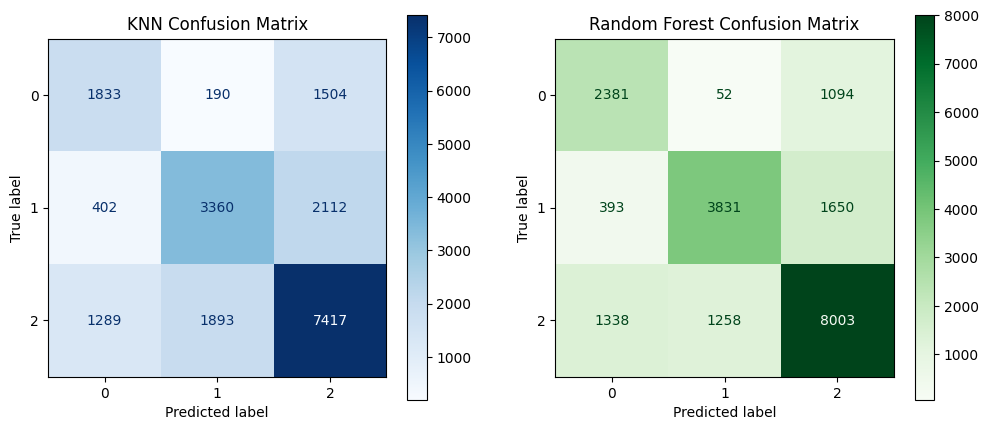

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_predictions(y_val, y_pred_knn, ax=axs[0], cmap='Blues')
axs[0].set_title('KNN Confusion Matrix')

ConfusionMatrixDisplay.from_predictions(y_val, y_pred_rf, ax=axs[1], cmap='Greens')
axs[1].set_title('Random Forest Confusion Matrix')

plt.show()


K-Means Metrics (after mapping clusters to labels):
Accuracy: 0.4794
F1 Score: 0.4887
Recall: 0.4794


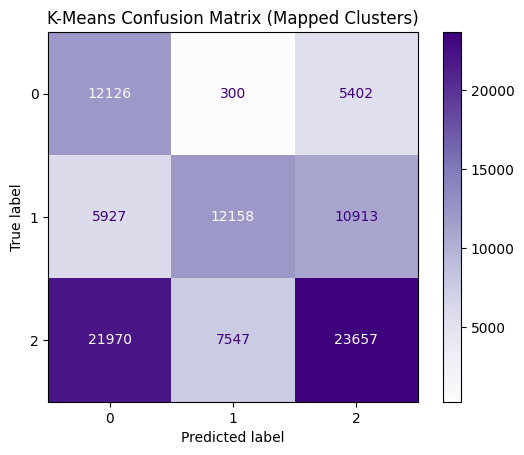

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt

# cluster_labels: predicted cluster labels from KMeans (e.g., kmeans.fit_predict(X_scaled))
# y_encoded: true labels encoded as integers

# 1. Map clusters to true labels using Hungarian Algorithm (best matching)
def map_clusters_to_labels(true_labels, cluster_labels):
    # Create confusion matrix between clusters and true labels
    conf_matrix = confusion_matrix(true_labels, cluster_labels)

    # Use Hungarian algorithm to find best one-to-one assignment
    row_ind, col_ind = linear_sum_assignment(-conf_matrix)  # maximize matching

    # Create mapping from cluster to label
    cluster_to_label = dict(zip(col_ind, row_ind))

    # Map each cluster label to the matched true label
    mapped_labels = np.array([cluster_to_label[cluster] for cluster in cluster_labels])

    return mapped_labels

# Map clusters to labels
kmeans_mapped_labels = map_clusters_to_labels(y_encoded, cluster_labels)

# 2. Calculate classification metrics treating mapped clusters as predictions
kmeans_accuracy = accuracy_score(y_encoded, kmeans_mapped_labels)
kmeans_f1 = f1_score(y_encoded, kmeans_mapped_labels, average='weighted')
kmeans_recall = recall_score(y_encoded, kmeans_mapped_labels, average='weighted')

print("K-Means Metrics (after mapping clusters to labels):")
print(f"Accuracy: {kmeans_accuracy:.4f}")
print(f"F1 Score: {kmeans_f1:.4f}")
print(f"Recall: {kmeans_recall:.4f}")

# 3. Plot confusion matrix for K-Means clusters vs true labels
ConfusionMatrixDisplay.from_predictions(y_encoded, kmeans_mapped_labels, cmap='Purples')
plt.title('K-Means Confusion Matrix (Mapped Clusters)')
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

# Sample 30% of training data for faster tuning
X_sample, _, y_sample, _ = train_test_split(X_train, y_train, train_size=0.3, random_state=42)

# Define a smaller parameter grid for quicker search
param_dist = {
    'n_estimators': [100, 200, 300],         # fewer options
    'max_depth': [10, 20, None],             # limited depth options
    'min_samples_split': [2, 5],             # fewer options
    'min_samples_leaf': [1, 2],              # fewer options
    'max_features': ['auto', 'sqrt']         # common choices only
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,          # fewer iterations
    cv=3,               # 3-fold CV
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='accuracy'
)

# Fit on the smaller sample
random_search.fit(X_sample, y_sample)

print("Best Parameters:", random_search.best_params_)
best_rf = random_search.best_estimator_

# Predict on full validation set
y_pred_best_rf = best_rf.predict(X_val)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
21 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


In [ ]:
print("Best hyperparameters found:", random_search.best_params_)


Best hyperparameters found: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

best_rf = random_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_val)

print("Tuned Random Forest Performance on Validation Set:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_best_rf):.4f}")
print(f"F1 Score: {f1_score(y_val, y_pred_best_rf, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_best_rf, average='weighted'):.4f}")


Tuned Random Forest Performance on Validation Set:
Accuracy: 0.7470
F1 Score: 0.7467
Recall: 0.7470


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Initialize Random Forest with class_weight balanced
rf_balanced = RandomForestClassifier(
    n_estimators=300,
    max_depth=30,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Train on the training data
rf_balanced.fit(X_train, y_train)

# Predict on validation set
y_pred_balanced = rf_balanced.predict(X_val)

# Evaluate
print("Random Forest with class_weight='balanced' Performance:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_balanced):.4f}")
print(f"F1 Score: {f1_score(y_val, y_pred_balanced, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_balanced, average='weighted'):.4f}")


Random Forest with class_weight='balanced' Performance:
Accuracy: 0.7961
F1 Score: 0.7957
Recall: 0.7961


Confusion Matrix:
[[2548   14  965]
 [  50 4696 1128]
 [ 698 1223 8678]]


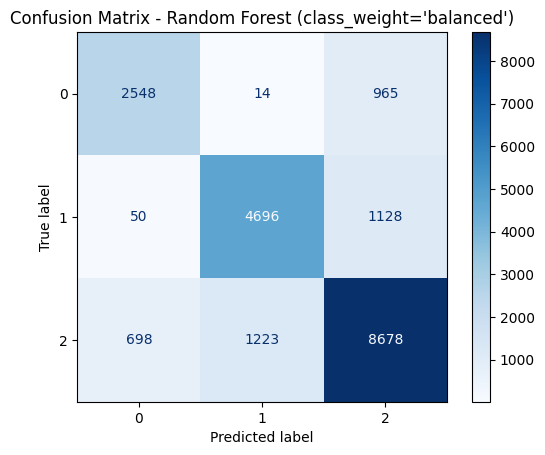

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# y_val: true labels for your validation set
# y_pred_balanced: predictions from your latest Random Forest model

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred_balanced)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest (class_weight='balanced')")
plt.show()


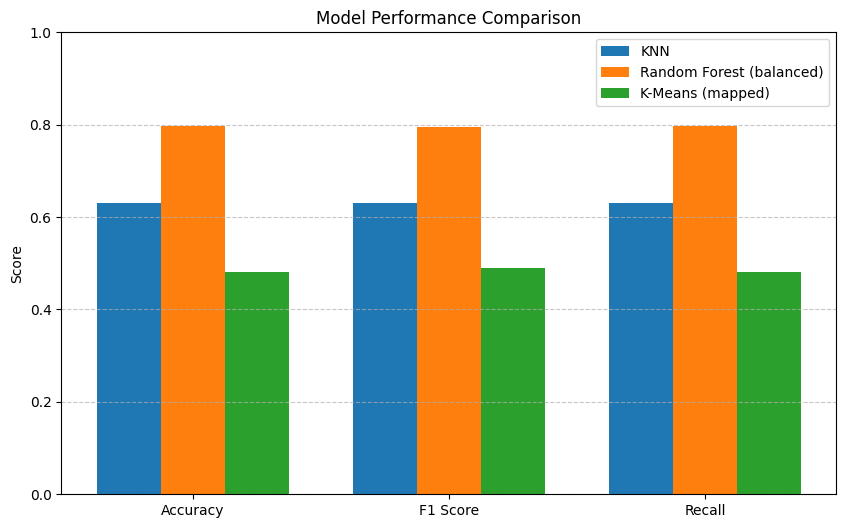

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# --- Assuming you have these variables already defined ---
# X_scaled: scaled features for the entire dataset (train + val + test)
# X_val: scaled features for validation set
# y_val: true labels for validation set
# y_pred_knn: KNN predictions on validation set
# y_pred_balanced: Random Forest (balanced) predictions on validation set
# y_encoded: encoded true labels for entire dataset (used for KMeans mapping)

# --- 1. Fit KMeans on entire scaled dataset ---
n_clusters = len(np.unique(y_encoded))  # number of unique classes
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# --- 2. Predict cluster labels for validation set only ---
kmeans_val_labels = kmeans.predict(X_val)

# --- 3. Map clusters to true labels on validation set ---
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

def map_clusters_to_labels(true_labels, cluster_labels):
    conf_matrix = confusion_matrix(true_labels, cluster_labels)
    row_ind, col_ind = linear_sum_assignment(-conf_matrix)
    cluster_to_label = dict(zip(col_ind, row_ind))
    mapped_labels = np.array([cluster_to_label[cluster] for cluster in cluster_labels])
    return mapped_labels

kmeans_val_mapped_labels = map_clusters_to_labels(y_val, kmeans_val_labels)

# --- 4. Calculate metrics for all three models ---

# KNN metrics
knn_acc = accuracy_score(y_val, y_pred_knn)
knn_f1 = f1_score(y_val, y_pred_knn, average='weighted')
knn_recall = recall_score(y_val, y_pred_knn, average='weighted')

# Random Forest (balanced) metrics
rf_acc = accuracy_score(y_val, y_pred_balanced)
rf_f1 = f1_score(y_val, y_pred_balanced, average='weighted')
rf_recall = recall_score(y_val, y_pred_balanced, average='weighted')

# K-Means metrics (mapped clusters)
kmeans_acc = accuracy_score(y_val, kmeans_val_mapped_labels)
kmeans_f1 = f1_score(y_val, kmeans_val_mapped_labels, average='weighted')
kmeans_recall = recall_score(y_val, kmeans_val_mapped_labels, average='weighted')

# --- 5. Plot bar chart comparing the models ---

metrics = ['Accuracy', 'F1 Score', 'Recall']
knn_scores = [knn_acc, knn_f1, knn_recall]
rf_scores = [rf_acc, rf_f1, rf_recall]
kmeans_scores = [kmeans_acc, kmeans_f1, kmeans_recall]

x = np.arange(len(metrics))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, knn_scores, width, label='KNN')
plt.bar(x, rf_scores, width, label='Random Forest (balanced)')
plt.bar(x + width, kmeans_scores, width, label='K-Means (mapped)')

plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
